In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 3/Human_activit_recognition.csv")

In [ ]:
data.head(5)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,...,fBodyBodyAccJerkMag.energy,fBodyBodyAccJerkMag.iqr,fBodyBodyAccJerkMag.entropy,fBodyBodyAccJerkMag.maxInds,fBodyBodyAccJerkMag.meanFreq,fBodyBodyAccJerkMag.skewness,fBodyBodyAccJerkMag.kurtosis,fBodyBodyGyroMag.mean,fBodyBodyGyroMag.std,fBodyBodyGyroMag.mad,fBodyBodyGyroMag.max,fBodyBodyGyroMag.min,fBodyBodyGyroMag.sma,fBodyBodyGyroMag.energy,fBodyBodyGyroMag.iqr,fBodyBodyGyroMag.entropy,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.meanFreq,fBodyBodyGyroMag.skewness,fBodyBodyGyroMag.kurtosis,fBodyBodyGyroJerkMag.mean,fBodyBodyGyroJerkMag.std,fBodyBodyGyroJerkMag.mad,fBodyBodyGyroJerkMag.max,fBodyBodyGyroJerkMag.min,fBodyBodyGyroJerkMag.sma,fBodyBodyGyroJerkMag.energy,fBodyBodyGyroJerkMag.iqr,fBodyBodyGyroJerkMag.entropy,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,-0.941,-0.566,-0.817,0.851,0.674,0.834,-0.987,-1.0,-1.000,-1.000,-0.997,-0.972,-0.983,-0.637,-0.5150,-0.537,0.360,-0.233,0.2260,0.0695,0.0643,-0.0764,0.138,-0.0368,0.231,-0.1150,0.3190,-0.48800,-0.0959,...,-1.0,-0.991,-1.0,-0.905,0.290,-0.669,-0.933,-0.988,-0.985,-0.984,-0.985,-0.995,-0.988,-1.000,-0.989,-0.736,-1.000,-0.2570,-0.32200,-0.6580,-0.996,-0.995,-0.994,-0.994,-0.997,-0.996,-1.0,-0.994,-0.956,-1.000,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,-0.940,-0.555,-0.816,0.845,0.685,0.838,-0.988,-1.0,-1.000,-1.000,-0.996,-0.980,-0.983,-0.629,-0.3970,-0.424,0.346,-0.174,0.1780,0.1690,-0.0202,0.1360,-0.114,0.2430,0.301,-0.0764,0.0820,0.15300,0.0085,...,-1.0,-0.984,-1.0,-1.000,0.502,-0.517,-0.786,-0.983,-0.981,-0.982,-0.979,-0.987,-0.983,-1.000,-0.981,-0.641,-1.000,-0.0472,0.00787,-0.2840,-0.991,-0.989,-0.991,-0.987,-0.980,-0.991,-1.0,-0.992,-0.923,-1.000,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,-0.943,-0.569,-0.823,0.852,0.693,0.846,-0.997,-1.0,-1.000,-1.000,-0.998,-0.993,-0.990,-0.888,-0.5540,-0.551,0.412,-0.128,0.2650,0.0677,0.2890,-0.2410,0.315,-0.1520,0.181,0.0504,-0.0398,-0.00999,0.0436,...,-1.0,-0.994,-1.0,-0.905,0.530,-0.606,-0.869,-0.999,-0.998,-0.998,-0.999,-0.998,-0.999,-1.000,-0.996,-1.000,-0.949,0.3250,-0.75900,-0.9420,-0.999,-0.999,-0.999,-0.999,-0.995,-0.999,-1.0,-0.999,-1.000,-0.968,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,-0.926,-0.448,-0.731,0.849,0.681,0.838,-0.904,-1.0,-0.989,-0.991,-0.989,-0.770,-0.869,-0.163,0.0546,0.073,0.158,-0.160,0.1900,-0.3220,-0.3150,0.2790,-0.307,0.3430,-0.083,0.0273,-0.0465,-0.08650,0.8220,...,-1.0,-0.984,-1.0,-1.000,0.169,-0.522,-0.818,-0.911,-0.884,-0.898,-0.880,-0.847,-0.911,-0.993,-0.956,-0.387,-1.000,-0.1730,0.07620,-0.3040,-0.990,-0.989,-0.990,-0.987,-0.999,-0.990,-1.0,-0.992,-0.923,-1.000,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0

In [ ]:
data.shape

(3609, 563)

In [ ]:
labels = data['activity']

In [ ]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(labels)
true_labels.shape

(3609,)

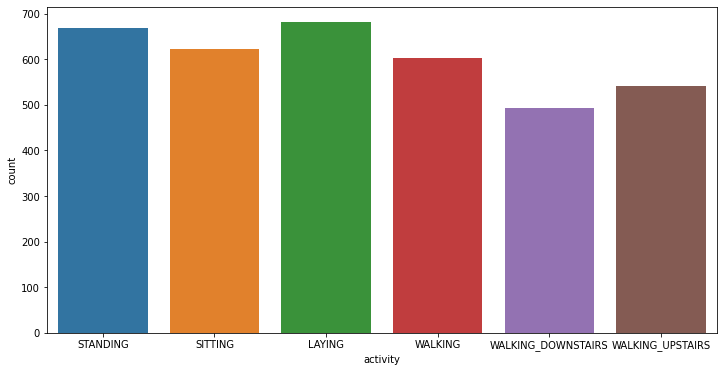

In [ ]:
import seaborn as sns
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="activity", ax=ax,data=data)

In [ ]:
data.isnull().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

In [ ]:
data_new = data.drop(['rn', 'activity'], axis = 1)

In [ ]:
from sklearn import preprocessing
# normalize the data attributes
normalized_data = preprocessing.normalize(data_new)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_data, true_labels, test_size=0.20)

In [ ]:
from sklearn.cluster import KMeans

Applying Elbow method to find the optimal K value

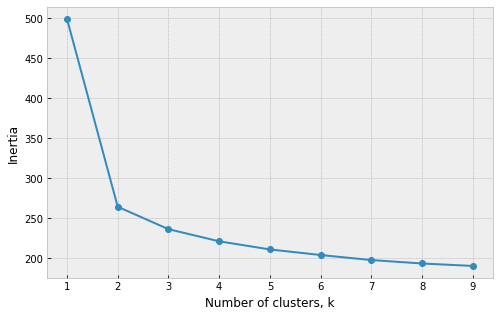

In [ ]:
#check the optimal k value
normalized_data = range(1, 10)
inertias = []

for k in n:
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    inertias.append(model.inertia_)

plt.figure(figsize=(10,5))
plt.style.use('bmh')
plt.plot(n, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(n)
plt.show()

## Training on Kmeans algorithms



In [ ]:
import time
start = time.time()
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_train)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1.6987159252166748


In [ ]:
print(kmeans.cluster_centers_)

[[ 0.01391097 -0.0008712  -0.00550174 ...  0.02564218 -0.02302094
  -0.0203019 ]
 [ 0.02124773 -0.00139983 -0.00822924 ... -0.05715754  0.01707857
   0.0043085 ]
 [ 0.01353063 -0.00039787 -0.00468742 ... -0.02736523  0.00177695
  -0.00497372]
 [ 0.01797513 -0.00144748 -0.00787079 ... -0.04703773  0.0158932
   0.00623124]
 [ 0.02475263 -0.0017084  -0.00928364 ... -0.06010144  0.01967962
   0.01006282]
 [ 0.01399098 -0.00085772 -0.00548196 ... -0.03779452  0.00586884
  -0.000883  ]]


In [ ]:
print(kmeans.labels_)

[5 0 1 ... 1 2 3]


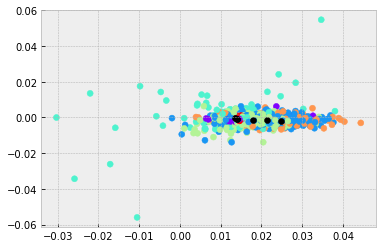

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [ ]:
y_pred = kmeans.predict(X_test)

In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [ ]:
print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     ')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    '
      %(kmeans.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      ))

inertia  homo    compl   v-meas   ARI     AMI     
204   0.589   0.636   0.612   0.474   0.608    


## Training on Kmeans algorithms by creating 2 clusters


In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

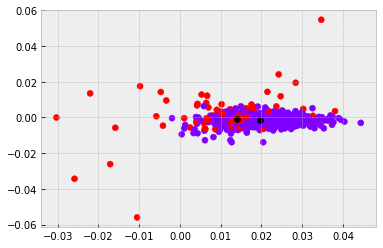

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [ ]:
y_pred = kmeans.predict(X_test)

In [ ]:
print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     ')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    '
      %(kmeans.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      ))

inertia  homo    compl   v-meas   ARI     AMI     
264   0.380   0.988   0.549   0.328   0.548    


## Applying PCA on the dataset

In [ ]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 6)   
pnormalized_data = pca.fit_transform(normalized_data) 


In [ ]:
pnormalized_data.shape

(3609, 6)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pnormalized_data, true_labels, test_size=0.20)

In [ ]:
import time
start = time.time()
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_train)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.2018444538116455


In [ ]:
y_pred = kmeans.predict(X_test)

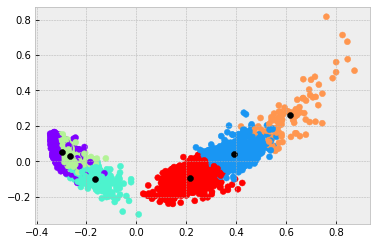

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [ ]:
print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     ')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    '
      %(kmeans.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      ))

inertia  homo    compl   v-meas   ARI     AMI     
52   0.602   0.652   0.626   0.491   0.622    


In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_pred = kmeans.predict(X_test)

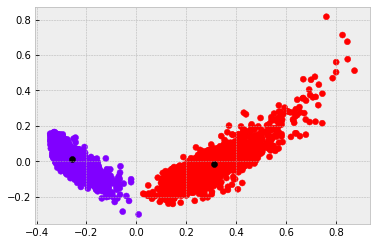

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [ ]:
print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     ')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    '
      %(kmeans.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      ))

inertia  homo    compl   v-meas   ARI     AMI     
108   0.386   1.000   0.557   0.331   0.556    
